# Tutorial 1: Damped pendulum
## Input/Output and regression

This problem consists of studying damped oscillations. Remember that the 2nd-order ODE describing damped oscillations is:

$$m\,\frac{d^2y}{dt^2}+b\,\frac{dy}{dt}+k\,y = 0,$$

where $m=1\,\rm kg$ is the oscillator mass, $b$ is the damping coefficient, and $k$ is the force constant of the oscillator. The analytical solution to the above ODE, known as the the damped oscillation equation, reads:

$$\boxed{y(t)=A\,e^{-\beta\,t}\,\cos{(\omega\,t)}},$$ 

where $A$ is  the inital oscillation amplitude, $\beta=b/2m$ is the damping ratio, and $\omega$ is the angular frequency of the oscillations given by:

$$\omega = \sqrt{\frac{k}{m}-\frac{b^2}{4m^2}}.$$

The data file given below contains a time series obtained from a damped harmonic oscillator experiment. The first column of the file has times in seconds $\rm [s]$ and the second column has the displacements in meters $\rm [m]$. It can be found at:

https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/damped_pendulum.csv

##### Data reference: https://www.kaggle.com/datasets/cici118/damped-harmonic-oscillator


### Activities to do: 

a) Create a python I/O function that opens the data file and returns $2$ arrays, one for times and one for displacements.

b) Call your I/O function and make a high-quality labeled plot of displacement (in the Y axis) versus time (in the X axis).

c) Use a physically-motivated model (i.e. the damped oscillation equation), and constrain its free parameters by carrying out a regression.

d) Report the results from your regression, i.e. the best-fit values for the free parametes with their respective uncertainties. Using your results, identify or calculate the following quantities in physical units:

- The initial amplitude, $A$, of the oscillations.
- The damping ratio, $\beta$.
- The angular frequency, $\omega$, of the damped pendulum.
- The damping coefficient, $b$.
- The force constant of the oscillator, $k$.

e) Make a plot showing the empirical data and the best-fit model obtained from your regression.

### a) Create a python I/O function that opens the data file and returns $2$ arrays, one for times and one for displacements.

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Inspection of the data

In [2]:
# Provide the path
path = 'damped_pendulum.csv' #or path = './damped_pendulum.csv' 

# Get it!
pendulum_dataset = pd.read_csv(path, sep = ',')
#Inspection:
print(pendulum_dataset)
print(pendulum_dataset.shape)
print(type(pendulum_dataset))

           time  displacement
0      0.000000  1.000000e+00
1      1.003345  5.523100e-01
2      2.006689 -3.387563e-01
3      3.010034 -8.466000e-01
4      4.013378 -5.608279e-01
..          ...           ...
195  195.652160  4.728779e-05
196  196.655520 -5.399856e-07
197  197.658860 -4.332556e-05
198  198.662200 -4.389308e-05
199  199.665540 -5.773922e-06

[200 rows x 2 columns]
(200, 2)
<class 'pandas.core.frame.DataFrame'>


#### Solving it without a function

In [3]:
# Get the arrays
time_array = np.array(pendulum_dataset.iloc[:,0]) ##(fila :, columna 0) por el ejemplo
#other option:
#time_array = np.array(pendulum_dataset['time'])
disp_array = np.array(pendulum_dataset['displacement'])

The problem has been solved, but not using a function. Let's combine this process into a function!

#### Function

In [4]:
def io_function(filename):
    """
    input: filename (string) -> path of the file
    Put here a description of the function.
    This function will get the path of the data set and 
    Outputs:    time(aray, float) -> time array
                displacements (array, float)-> displacements
    """
    # Read the file:
    df = pd.read_csv(filename, sep = ',')

    # Get data into arrays: divide the two arrays
    time = np.array(df['time'])
    displacements = np.array(df['displacement'])

    return time, displacements

### b) Call your I/O function and make a high-quality labeled plot of displacement (in the Y axis) versus time (in the X axis).

In [5]:
# Use the function
time_array, disp_array = io_function(path)

In [6]:
#Just to check the shapes:
print(time_array.shape, disp_array.shape)

(200,) (200,)


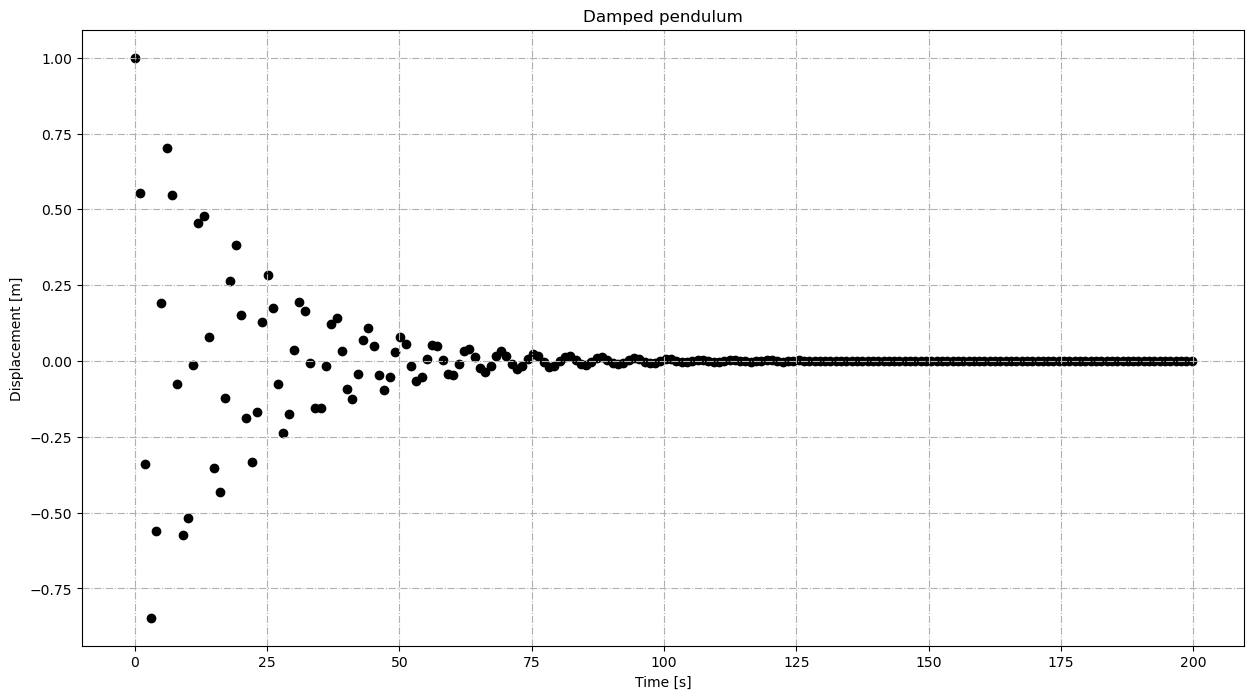

In [7]:
# Plotting
plt.figure(figsize=(15,8))

plt.scatter(time_array, disp_array, marker="o", color="k" )

plt.title('Damped pendulum')
plt.xlabel("Time [s]")
plt.ylabel("Displacement [m]")


plt.grid(linestyle="-.")
plt.show()
plt.close()

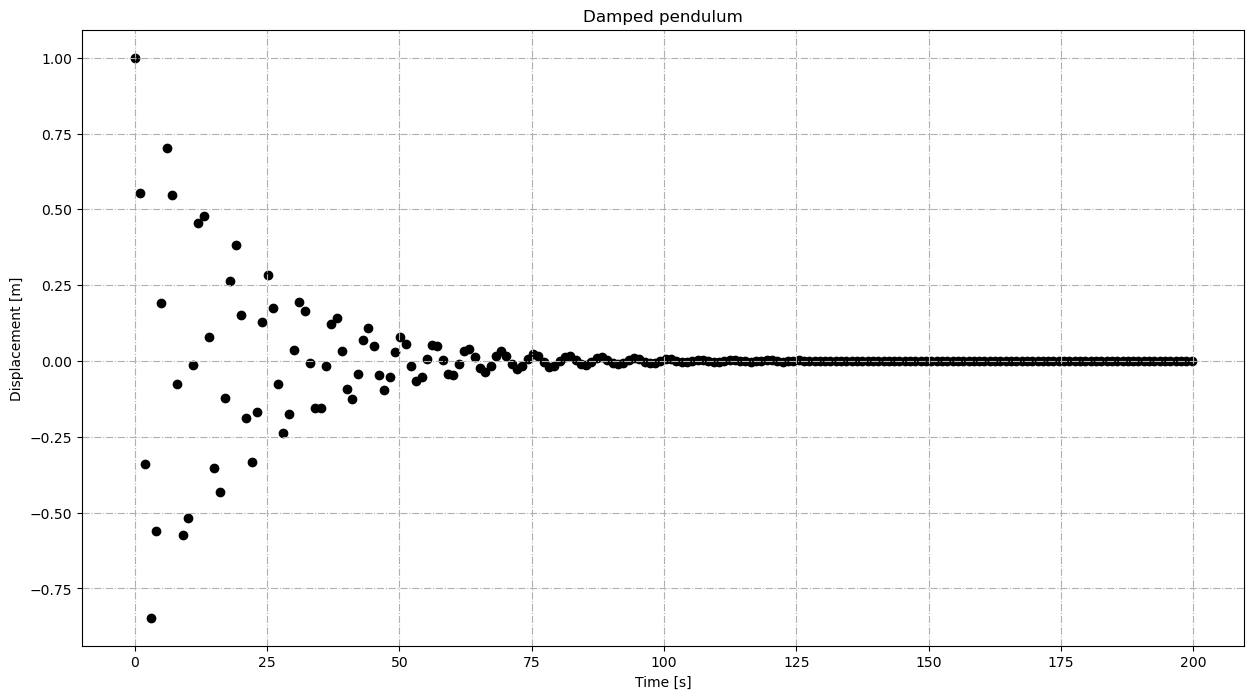

In [8]:
##Combined function:

def io_function(filename,showPlt):
    """
    input: filename (string) -> path of the file
    Put here a description of the function.
    This function will get the path of the data set and 
    Outputs:    time(aray, float) -> time array
                displacements (array, float)-> displacements
    """
    # Read the file:
    df = pd.read_csv(filename, sep = ',')

    # Get data into arrays: divide the two arrays
    time = np.array(df['time'])
    displacements = np.array(df['displacement'])

    # Plotting
    fig_1=plt.figure(figsize=(15,8))
    
    plt.scatter(time, displacements, marker="o", color="k" )
    
    plt.title('Damped pendulum')
    plt.xlabel("Time [s]")
    plt.ylabel("Displacement [m]")
    
    
    plt.grid(linestyle="-.")
    if showPlt:
        plt.show()
    plt.close()

    return time, displacements, fig_1
##Test of the functions:
tim_array, disp_array, figure1=io_function(path, True)

### c) Use a physically-motivated model, and constrain its free parameters by carrying out a regression.

The model we\re going to use is:
$$y(t)=A*e^{\beta  t} cos(\omega t)$$

In [9]:
# Model
def physical_model(times, A, beta, omega):
    """
    We need the solution for the case overdamped here is trying to get that model
    """
    return A*np.exp(-beta*times)*np.cos(omega*times)

In [10]:
# Import the library
import scipy.optimize as opt

In [11]:
# Call the curve_fit() function
"""
Toma el modelo, datos en , datos en y, sigma es la incertidumbre en y 
return array coef
y matriz 3d para obtener las incertidumbres de los parametros
"""
coef, cova = opt.curve_fit(physical_model, time_array, disp_array)

#Watch the coeff:
print(coef) #Here could be recommendable explain about each value
print(cova) #have to have the same shape of the number of coef 3-> 3x3

[1.0031306  0.05012387 0.9962379 ]
[[1.03070555e-05 5.12763534e-07 1.76549028e-10]
 [5.12763534e-07 5.68731478e-08 1.23397638e-11]
 [1.76549028e-10 1.23397638e-11 3.13625400e-08]]


In [12]:
# Get the regression curve:
fit_array = physical_model(time_array, *coef) #asterisco toma todos los parametros de coef en lugar de irlos enlistando

### d) Report the results from your regression, i.e. the best-fit values for the free parametes with their respective uncertainties. Using your results, identify or calculate the following quantities in physical units:

- The initial amplitude, $A$, of the oscillations.
- The damping ratio, $\beta$.
- The angular frequency, $\omega$, of the damped pendulum.
- The damping coefficient, $b$.
- The force constant of the oscillator, $k$.

In [13]:
#Function
def reporting(coef,cova, coef_name):
    """
    """
    #uncertainties:
    uncertainties= np.sqrt(np.diag(cova))

    #Run this loop:
    for i in range(len(coef)):
        print(f"{coef_name[i]}= {coef[1]} +/- {uncertainties[i]}")

    return uncertainties

In [14]:
#Define the names 
coef_names = ["A","beta","omega"]

#Cal the function
uncertainties_array = reporting(coef, cova, coef_names)

A= 0.05012386759729784 +/- 0.0032104603262126455
beta= 0.05012386759729784 +/- 0.00023848091712001625
omega= 0.05012386759729784 +/- 0.00017709472044529683


In [15]:
# A, beta and omega are given directly
A, beta, omega = coef[0], coef[1], coef[2]

# Then
print(f'Simply, A = {A}, \n beta = {beta},\n omega = {omega}.')

Simply, A = 1.0031306018680461, 
 beta = 0.05012386759729784,
 omega = 0.9962379022570641.


In [16]:
# Since beta = b/2m and m = 1kg,
b = beta*2
b_delta= uncertainties_array[1]*2
print(f'b = {b}. +/- {b_delta}.' )

b = 0.10024773519459568. +/- 0.0004769618342400325.


While $k$ should be given by
$$\omega = \sqrt{\frac{k}{m}-\frac{b^2}{4m^2}} \implies k = m\left(\omega² + \frac{b²}{4m²}\right).$$
and it's uncertainty by using propagation is:
$$\Delta_k= 2\sqrt{\omega^2 \Delta_{w}^2+b^2 \Delta_b^2}$$

In [17]:
# So that
k = omega**2+b**2/4
print(f'k = {k}.')

##Uncertainty in k :

k_delta= 2*np.sqrt(omega**2*uncertainties_array[-1]**2+b**2*b_delta**2)
print(f"k={k} +/- {k_delta}.")

k = 0.9950023599964671.
k=0.9950023599964671 +/- 0.00036558565329013404.


### e) Make a plot showing the empirical data and the best-fit model obtained from your regression.

In [33]:
## Increase the time resolution

new_time_array= np.linspace(time_array[0], time_array[-1],2000)

new_fit_array= physical_model(new_time_array,*coef)

print(new_fit_array)

[ 1.00313060e+00  9.93183534e-01  9.73533846e-01 ... -3.19554830e-05
 -2.84184912e-05 -2.46362766e-05]


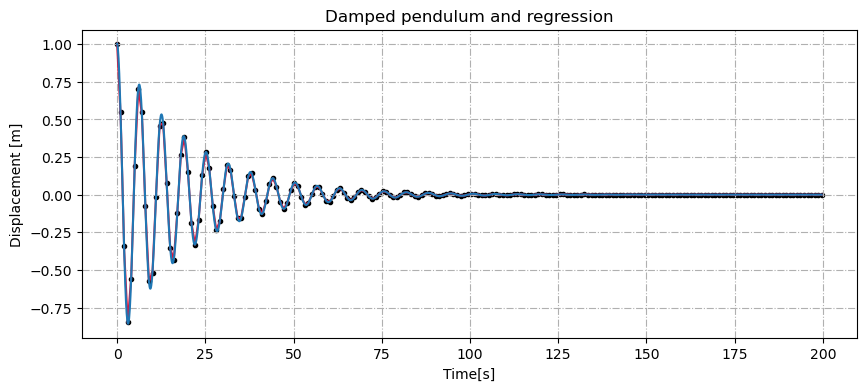

In [35]:
# Plotting:
plt.figure(figsize=(10,4))

plt.scatter(time_array, disp_array, marker = '.', label="Experimental data", color="k")
plt.plot(time_array, fit_array, color="crimson")
plt.plot(new_time_array, new_fit_array, color="C10")

plt.title('Damped pendulum and regression')
plt.xlabel("Time[s]")
plt.ylabel("Displacement [m]")

plt.grid(linestyle="-.")

plt.show()
plt.close()